In [3]:
# general imports
import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal

In [4]:
# audio reading and writing
from scipy.io.wavfile import read as wavread
import pydub
import wave

In [9]:
import librosa
import librosa.display
import madmom

In [6]:
# use some things to normalize
from torch import FloatTensor
from torch.nn.functional import normalize as torchnorm

# vecs = np.random.rand(3, 16, 16, 16)
# norm_vecs = normalize(FloatTensor(vecs), dim=0, eps=1e-16).numpy()

In [7]:
#graphical libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()
%matplotlib inline

In [5]:
SAMPLES = 500

In [6]:
_, wavdata = wavread("/home/leo/Music/lucaStragnoli-FeelGoodINC.wav")

In [7]:
resampled = sp.signal.resample(wavdata, SAMPLES)

In [8]:
resampled.shape

(500, 2)

In [26]:
wavdata = np.transpose(wavdata)

In [9]:
yl = np.abs(np.transpose(resampled)[0])
yr = np.abs(np.transpose(resampled)[1])
x = np.linspace(0,2*np.pi, SAMPLES)

In [10]:
yl.shape, yr.shape, x.shape

((500,), (500,), (500,))

In [11]:
# color maps trials

cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']


cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']


cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']



In [13]:

def load_wav(fpath):
    return wavread(fpath)


def resample(song, nsamples=1024, abs=False, max_val=2 * np.pi):
    """
    returns left channel as positive values, right channel as negative ones and the time position
    :param song: numpy array with the signal to resample
    :param nsamples: number of samples of the output array
    :param abs:  if True returns absolute values only
    :param max_val: maximum value of the x value indices, defauls to 2*PI for circular displays
    :return: (sampled_arr,x values indices)
    """
    res = sp.signal.resample(song, nsamples)
    x = np.linspace(0, max_val, nsamples)
    if abs:
        res = np.abs(res)

    return res, x

In [14]:
wav = "/home/leo/Music/lucaStragnoli-FeelGoodINC.wav"
outbasename = "/home/leo/projects/MUSIC-ART/samples/sample-"

In [17]:
selectedcnames = [
    'viridis', 'plasma', 'inferno', 'magma', 'cividis',
#    'viridis', 'plasma', 'cividis',
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
    'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
    'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
    'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'
]

## Processing the signal and plotting different elements:

1. Spectrogram
2. Power Spectral Density
3. Correlation between channels
4. Magnitud and Phase Spectrum signals
5. Process and extract main note and chord from each spectral window


Color Pallette is not important for the moment, those samples will be done later once the color pallets have been chosen.



In [28]:
cmap =  plt.get_cmap('plasma', SAMPLES).colors

In [64]:
2**15

32768

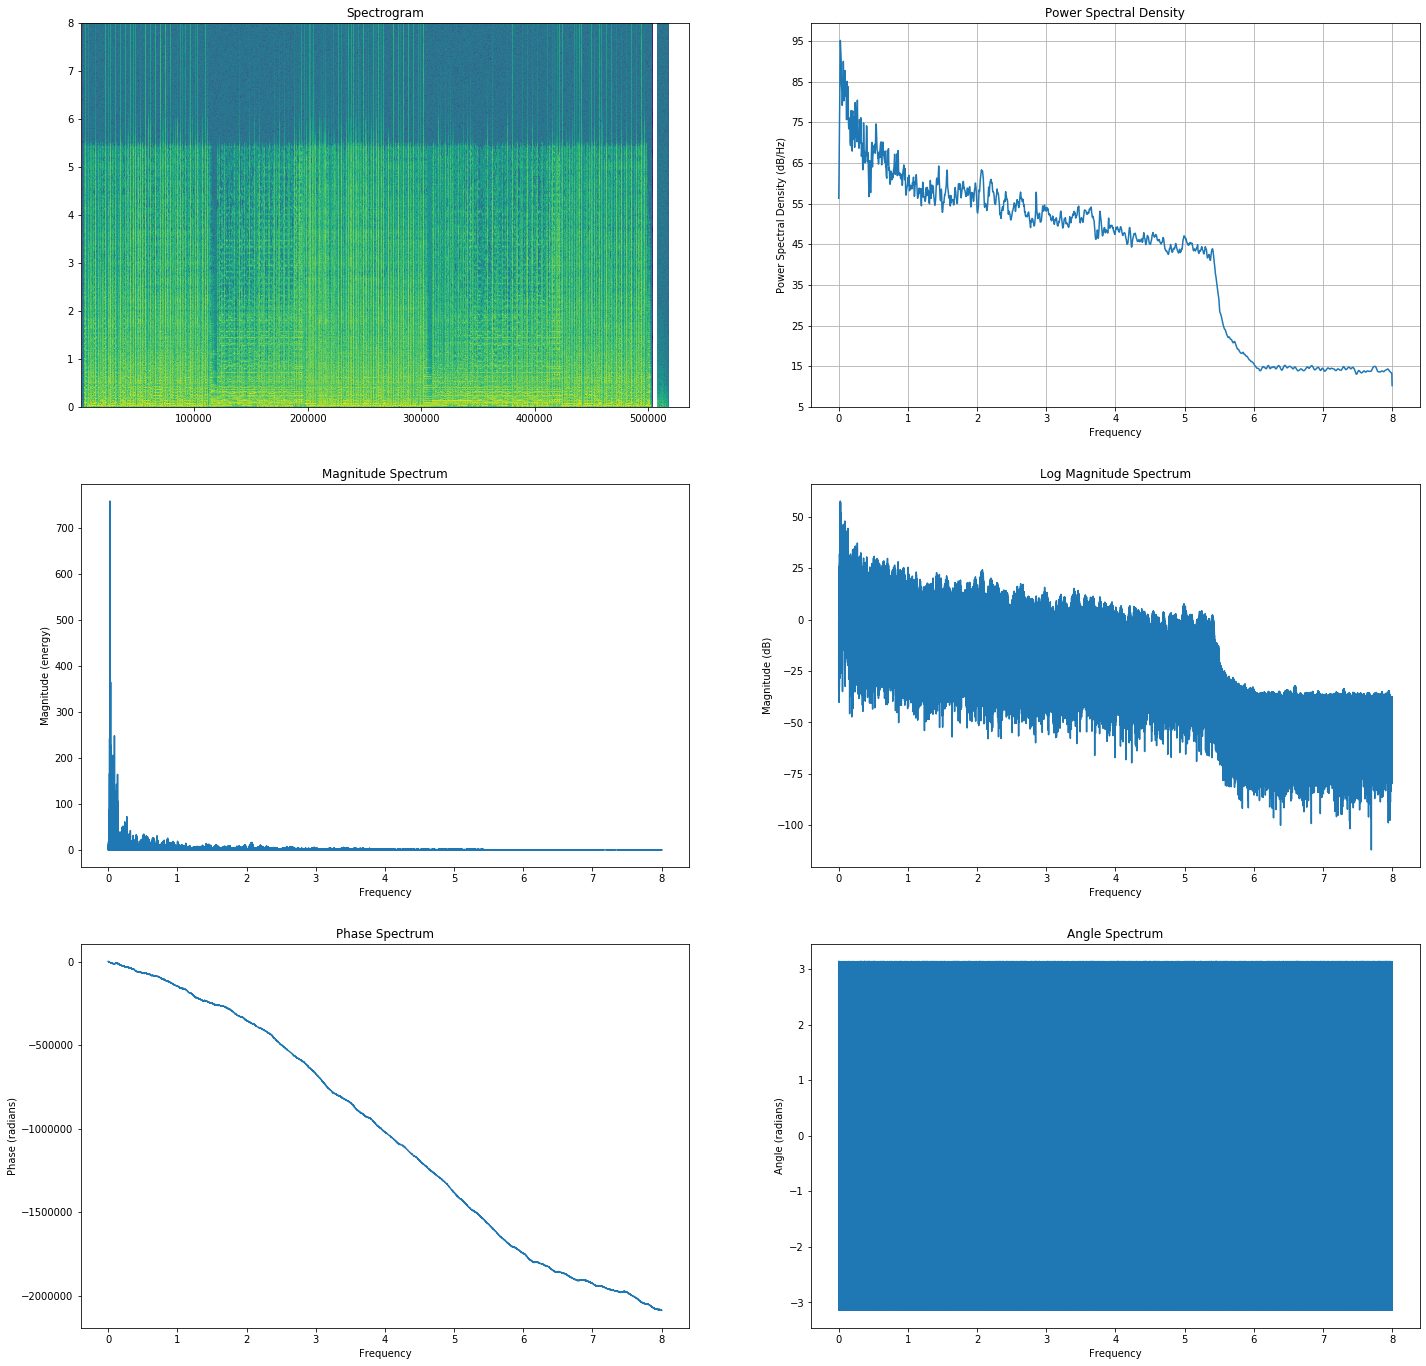

In [71]:
# _, wavdata = load
figsize=(24,24)
# fig,axs = plt.subplots(nrows=4, ncols=2)  # 
fig = plt.figure(figsize=figsize)
NFFT = 4096  # 1024  # 256
Fs= 16  # 4  # 2
noverlap= 2048 # 128
# set no grids as I want white background
# for ax in axs:
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)

#spectrogram
ax0 = fig.add_subplot(3, 2, 1)
ax0.set_title("Spectrogram")
spec2d,spec_freqs1d,spec_t, spec_im = ax0.specgram(wavdata[0], NFFT=NFFT,Fs=Fs, noverlap=noverlap)

# Power Spectral Density 
ax1 = fig.add_subplot(3, 2, 2)
ax1.set_title("Power Spectral Density")
psd_pxx, psd_freas, psd_line = ax1.psd(wavdata[0], NFFT=NFFT,Fs=Fs, noverlap=noverlap, return_line=True)

ax2 = fig.add_subplot(3, 2, 3)
ax2.set_title("Magnitude Spectrum")
magspec_spec, magspec_freq, magspec_line = ax2.magnitude_spectrum(wavdata[0], Fs=Fs)

ax3 = fig.add_subplot(3, 2, 4)
ax3.set_title("Log Magnitude Spectrum")
lmagspec_spec, lmagspec_freq, lmagspec_line = ax3.magnitude_spectrum(wavdata[0], Fs=Fs, scale='dB')

ax4 = fig.add_subplot(3, 2, 5)
ax4.set_title("Phase Spectrum")
phase_spec, phase_freq, phase_line = ax4.phase_spectrum(wavdata[0], Fs=Fs)

# angle does not show a nice graph (the scale and all makes basically an entire blue square)
ax5 = fig.add_subplot(3, 2, 6)
ax5.set_title("Angle Spectrum")
angle_spec, angle_freq, angle_line = ax5.angle_spectrum(wavdata[0], Fs=Fs)

# ax5 = fig.add_subplot(3, 2, 6)
# ax5.set_title("Log Phase Spectrum")
# lphase_spec, lphase_freq, lphase_line = ax5.phase_spectrum(wavdata[0], Fs=Fs, scale='dB')

plt.savefig("../../MUSIC-ART/samples/SpectralPlots1.png")
plt.show(fig)

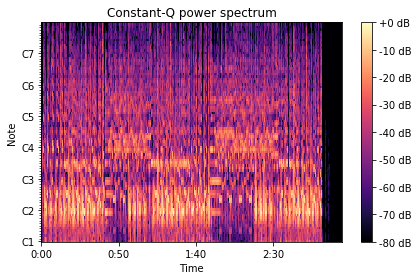

In [17]:
y, sr = librosa.load(wav)
C = np.abs(librosa.cqt(y, sr=sr))
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.savefig(outbasename+"CQT-power-spect.png")
plt.show()

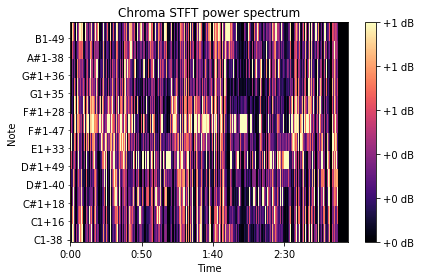

In [22]:
chroma_stft = librosa.feature.chroma_stft(y, sr=sr)
librosa.display.specshow(chroma_stft, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Chroma STFT power spectrum')
plt.tight_layout()
plt.savefig(outbasename+"Chroma-STFT-power-spect.png")
plt.show()

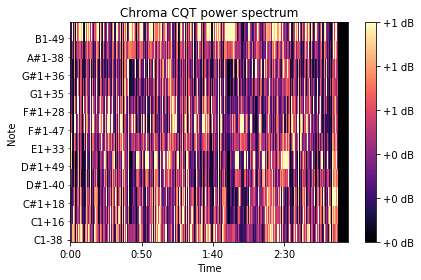

In [29]:
chroma_cqt = librosa.feature.chroma_cqt(y, sr=sr)
librosa.display.specshow(chroma_cqt, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Chroma CQT power spectrum')
plt.tight_layout()
plt.savefig(outbasename+"Chroma-CQT-power-spect.png")
plt.show()

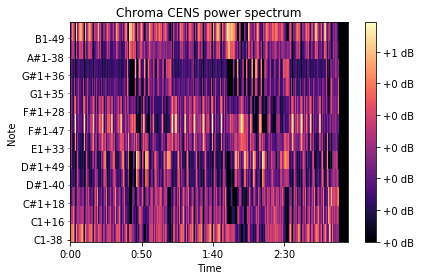

In [27]:
chroma_cens = librosa.feature.chroma_cens(y, sr=sr)
librosa.display.specshow(chroma_cens, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Chroma CENS power spectrum')
plt.tight_layout()
plt.savefig(outbasename+"Chroma-CENS-power-spect.png")
plt.show()

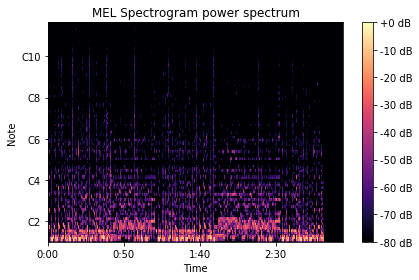

In [46]:
melspect = librosa.feature.melspectrogram(y, sr=sr)
librosa.display.specshow(librosa.amplitude_to_db(melspect, ref=np.max), x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('MEL Spectrogram power spectrum')
plt.tight_layout()
plt.savefig(outbasename+"MEL-spectrogram.png")
plt.show()

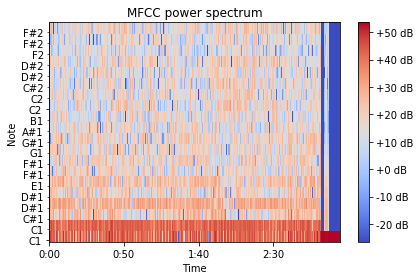

In [47]:
mfcc = librosa.feature.mfcc(y, sr=sr)
librosa.display.specshow(librosa.amplitude_to_db(mfcc), x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC power spectrum')
plt.tight_layout()
plt.savefig(outbasename+"MFCC.png")
plt.show()

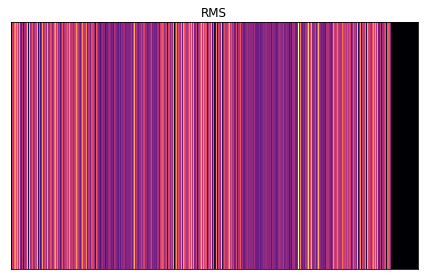

In [43]:
rms = librosa.feature.rms(y)
librosa.display.specshow(rms)
# plt.colorbar(format='%+2.0f dB')
plt.title('RMS')
plt.tight_layout()
plt.savefig(outbasename+"rms.png")
plt.show()

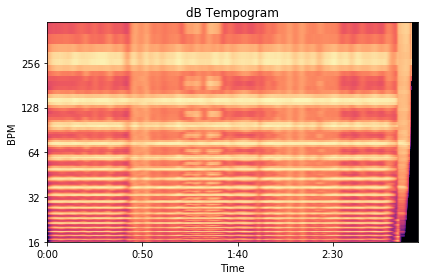

In [50]:
tempogram = librosa.feature.tempogram(y, sr=sr)
librosa.display.specshow(librosa.amplitude_to_db(tempogram), x_axis='time', y_axis='tempo')
# plt.colorbar(format='%+2.0f dB')
plt.title('dB Tempogram')
plt.tight_layout()
plt.savefig(outbasename+"dB-tempogram.png")
plt.show()

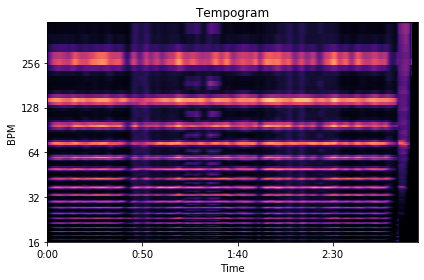

In [49]:
tempogram = librosa.feature.tempogram(y, sr=sr)
librosa.display.specshow(tempogram, x_axis='time', y_axis='tempo')
# plt.colorbar(format='%+2.0f dB')
plt.title('Tempogram')
plt.tight_layout()
plt.savefig(outbasename+"tempogram.png")
plt.show()

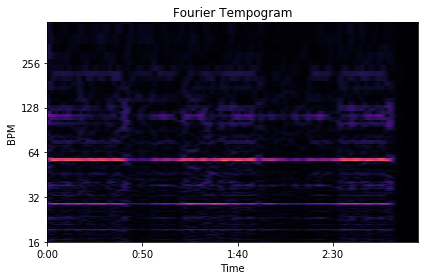

In [41]:
fourier_tempogram = librosa.feature.fourier_tempogram(y, sr=sr)
librosa.display.specshow(fourier_tempogram, x_axis='time', y_axis='bpm')
# plt.colorbar(format='%+2.0f dB')
plt.title('Fourier Tempogram')
plt.tight_layout()
plt.savefig(outbasename+"fourier_tempogram.png")
plt.show()

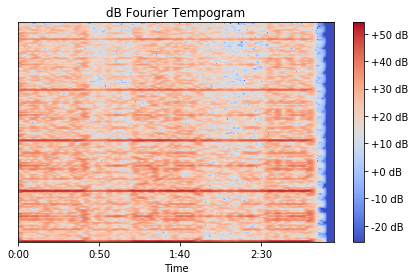

In [52]:
fourier_tempogram = librosa.feature.fourier_tempogram(y, sr=sr)
librosa.display.specshow(librosa.amplitude_to_db(fourier_tempogram), x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('dB Fourier Tempogram')
plt.tight_layout()
plt.savefig(outbasename+"dB-fourier_tempogram.png")
plt.show()